In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
drive_path = '/content/drive/MyDrive/beijing_multisite_airquality/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228'

In [6]:
dataframes = []
for filename in os.listdir(drive_path):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(drive_path, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        dataframes.append(df)  # Add the DataFrame to the list

In [18]:
all_data = pd.concat(dataframes, ignore_index=True)

In [19]:
all_data.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [20]:
all_data.tail(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
420764,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
420765,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
420766,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling
420767,35064,2017,2,28,23,13.0,16.0,4.0,9.0,500.0,74.0,7.0,1009.4,-12.2,0.0,N,1.9,Dingling


In [21]:
all_data.shape
print(f'No of Rows: {all_data.shape[0]}, No of Columns: {all_data.shape[1]}')

No of Rows: 420768, No of Columns: 18


In [22]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [23]:
all_data = all_data.drop('No', axis=1)
all_data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [24]:
def calculate_air_quality_index(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    max_value = row[pollutants].max()

    if max_value <= 50:
        return 'Excelent'
    elif max_value <= 100:
        return 'Good'
    elif max_value <= 150:
        return 'Slightly Polluted'
    elif max_value <= 200:
        return 'Lightly Polluted'
    elif max_value <= 250:
        return 'Moderately Polluted'
    elif max_value <= 300:
        return 'Heavily Polluted'
    else:
        return 'Severely Polluted'

all_data['Air_Quality_Index'] = all_data.apply(calculate_air_quality_index, axis=1)

Standardizing Data Types

In [25]:

# Convert 'day', 'month', and 'year' columns to datetime objects
all_data['day'] = all_data['day'].astype(str)
all_data['month'] = all_data['month'].astype(str)
all_data['year'] = all_data['year'].astype(str)
all_data['hour'] = all_data['year'].astype(str)

all_data['date'] = all_data['day'] + '/' + all_data['month'] + '/' + all_data['year']

all_data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Air_Quality_Index,date
0,2013,3,1,2013,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,Heavily Polluted,1/3/2013
1,2013,3,1,2013,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,Heavily Polluted,1/3/2013
2,2013,3,1,2013,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,Heavily Polluted,1/3/2013
3,2013,3,1,2013,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,Severely Polluted,1/3/2013
4,2013,3,1,2013,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,Severely Polluted,1/3/2013


In [26]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,412029.0,79.793428,80.822391,2.0000,20.0,55.0,111.0,999.0
PM10,414319.0,104.602618,91.772426,2.0000,36.0,82.0,145.0,999.0
SO2,411747.0,15.830835,21.650603,0.2856,3.0,7.0,20.0,500.0
NO2,408652.0,50.638586,35.127912,1.0265,23.0,43.0,71.0,290.0
CO,400067.0,1230.766454,1160.182716,100.0000,500.0,900.0,1500.0,10000.0
O3,407491.0,57.372271,56.661607,0.2142,11.0,45.0,82.0,1071.0
TEMP,420370.0,13.538976,11.436139,-19.9000,3.1,14.5,23.3,41.6
PRES,420375.0,1010.746982,10.474055,982.4000,1002.3,1010.4,1019.0,1042.8
DEWP,420365.0,2.490822,13.793847,-43.4000,-8.9,3.1,15.1,29.1
RAIN,420378.0,0.064476,0.821004,0.0000,0.0,0.0,0.0,72.5


In [27]:
category_columns = all_data.select_dtypes(include=['object']).columns
category_columns

Index(['year', 'month', 'day', 'hour', 'wd', 'station', 'Air_Quality_Index',
       'date'],
      dtype='object')

In [28]:
all_data[category_columns].describe().T

,count,unique,top,freq
year,420768,5,2016,105408
month,420768,12,3,35712
day,420768,31,1,13824
hour,420768,5,2016,105408
wd,418946,16,NE,43335
station,420768,12,Guanyuan,35064
Air_Quality_Index,420768,7,Severely Polluted,349957
date,420768,1461,1/3/2013,288


In [29]:
all_data.dtypes

,0
year,object
month,object
day,object
hour,object
PM2.5,float64
PM10,float64
SO2,float64
NO2,float64
CO,float64
O3,float64


In [30]:
all_data['station'].unique()

array(['Guanyuan', 'Nongzhanguan', 'Shunyi', 'Changping', 'Tiantan',
       'Wanliu', 'Dongsi', 'Huairou', 'Aotizhongxin', 'Wanshouxigong',
       'Gucheng', 'Dingling'], dtype=object)

In [31]:
all_data['Air_Quality_Index'].unique()

array(['Heavily Polluted', 'Severely Polluted', 'Good',
       'Lightly Polluted', 'Slightly Polluted', 'Moderately Polluted',
       'Excelent'], dtype=object)

In [32]:
all_data['year'].unique()

array(['2013', '2014', '2015', '2016', '2017'], dtype=object)

In [33]:
all_data['month'].unique()

array(['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '1', '2'],
      dtype=object)

In [34]:
all_data['wd'].unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

In [35]:
all_data['Air_Quality_Index'].value_counts()

,count
Air_Quality_Index,
Severely Polluted,349957
Heavily Polluted,32656
Lightly Polluted,20094
Good,9711
Slightly Polluted,4075
Excelent,2784
Moderately Polluted,1491


In [36]:
all_data['station'].value_counts()

,count
station,
Guanyuan,35064
Nongzhanguan,35064
Shunyi,35064
Changping,35064
Tiantan,35064
Wanliu,35064
Dongsi,35064
Huairou,35064
Aotizhongxin,35064


In [37]:
missing_values = all_data.isnull()
missing_values

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Air_Quality_Index,date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
420764,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
420765,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
420766,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


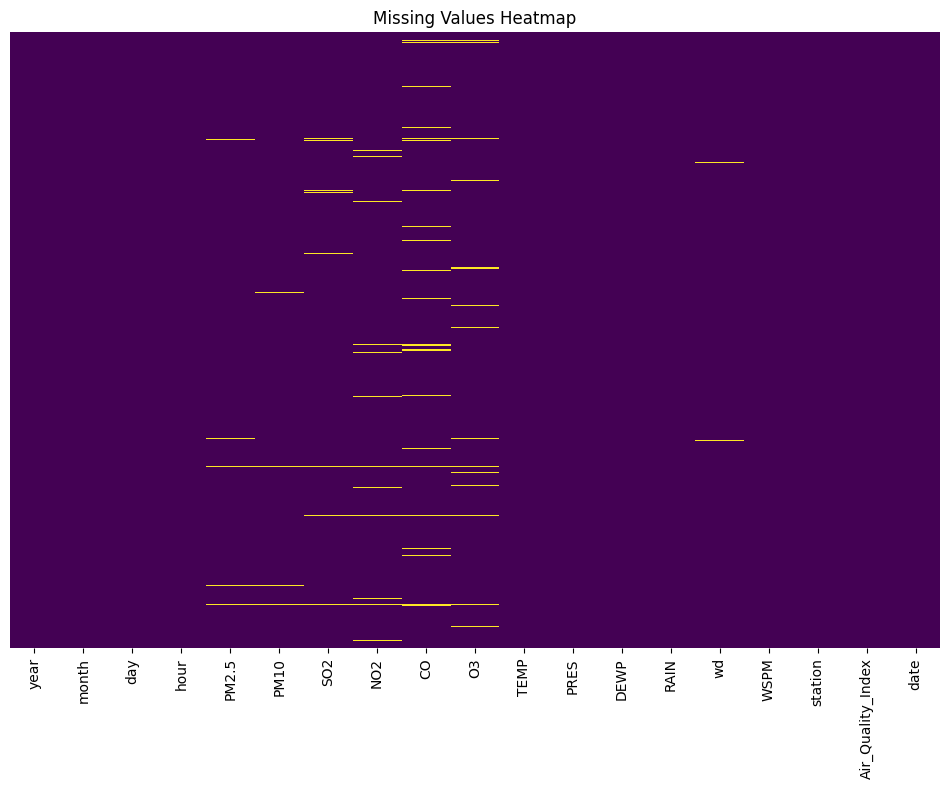

In [38]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
sns.heatmap(missing_values, cbar=False, cmap="viridis", yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [39]:
all_data.isnull().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701
O3,13277


In [40]:
all_data['wd'] = all_data['wd'].fillna(all_data['wd'].mode().iloc[0])

all_data['wd'].value_counts()


,count
wd,
NE,45157
ENE,34142
NW,32600
N,30869
E,29752
SW,28756
NNE,28232
NNW,25326
WNW,24375


In [41]:
all_data.interpolate(method='linear', inplace=True)

<ipython-input-41-eedc11ad2f02>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  all_data.interpolate(method='linear', inplace=True)


In [42]:
all_data.isnull().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0


In [43]:
missing_values = all_data.isnull()

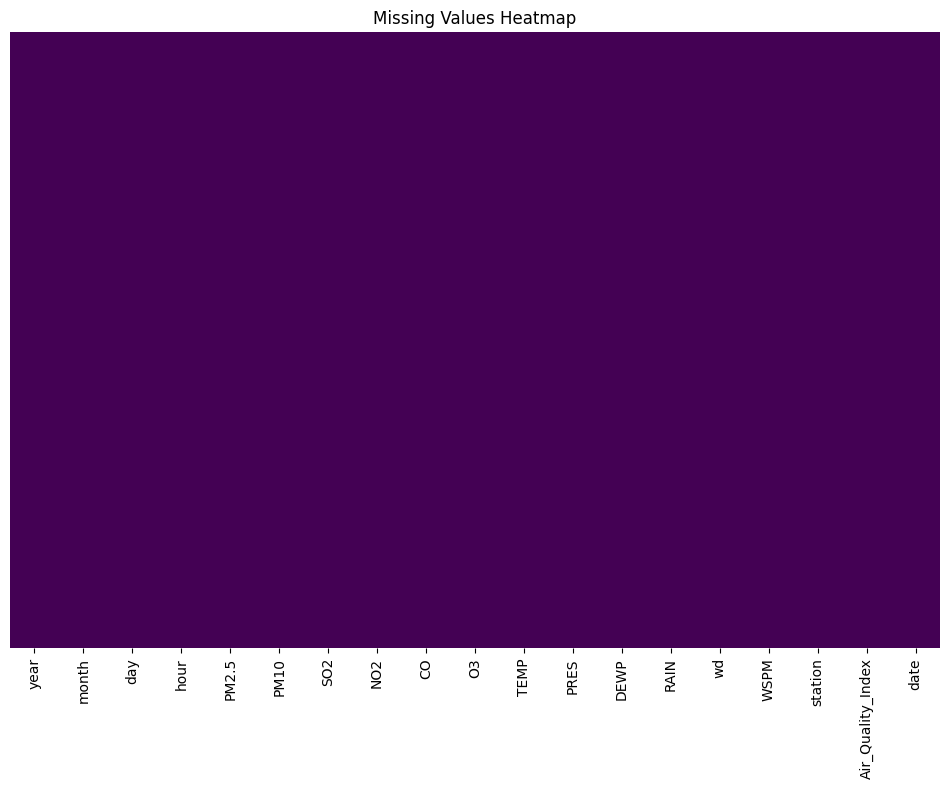

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(missing_values, cbar=False, cmap="viridis", yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [45]:
checking_duplicates = all_data.duplicated().sum()
checking_duplicates

0

In [46]:
duplicate_rows = all_data[all_data.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)
num_duplicates = all_data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Duplicate Rows:
Empty DataFrame
Columns: [year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station, Air_Quality_Index, date]
Index: []
Number of duplicate rows: 0


In [47]:
numerical_columns = all_data.select_dtypes(include=['number']).columns
numerical_columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM'],
      dtype='object')

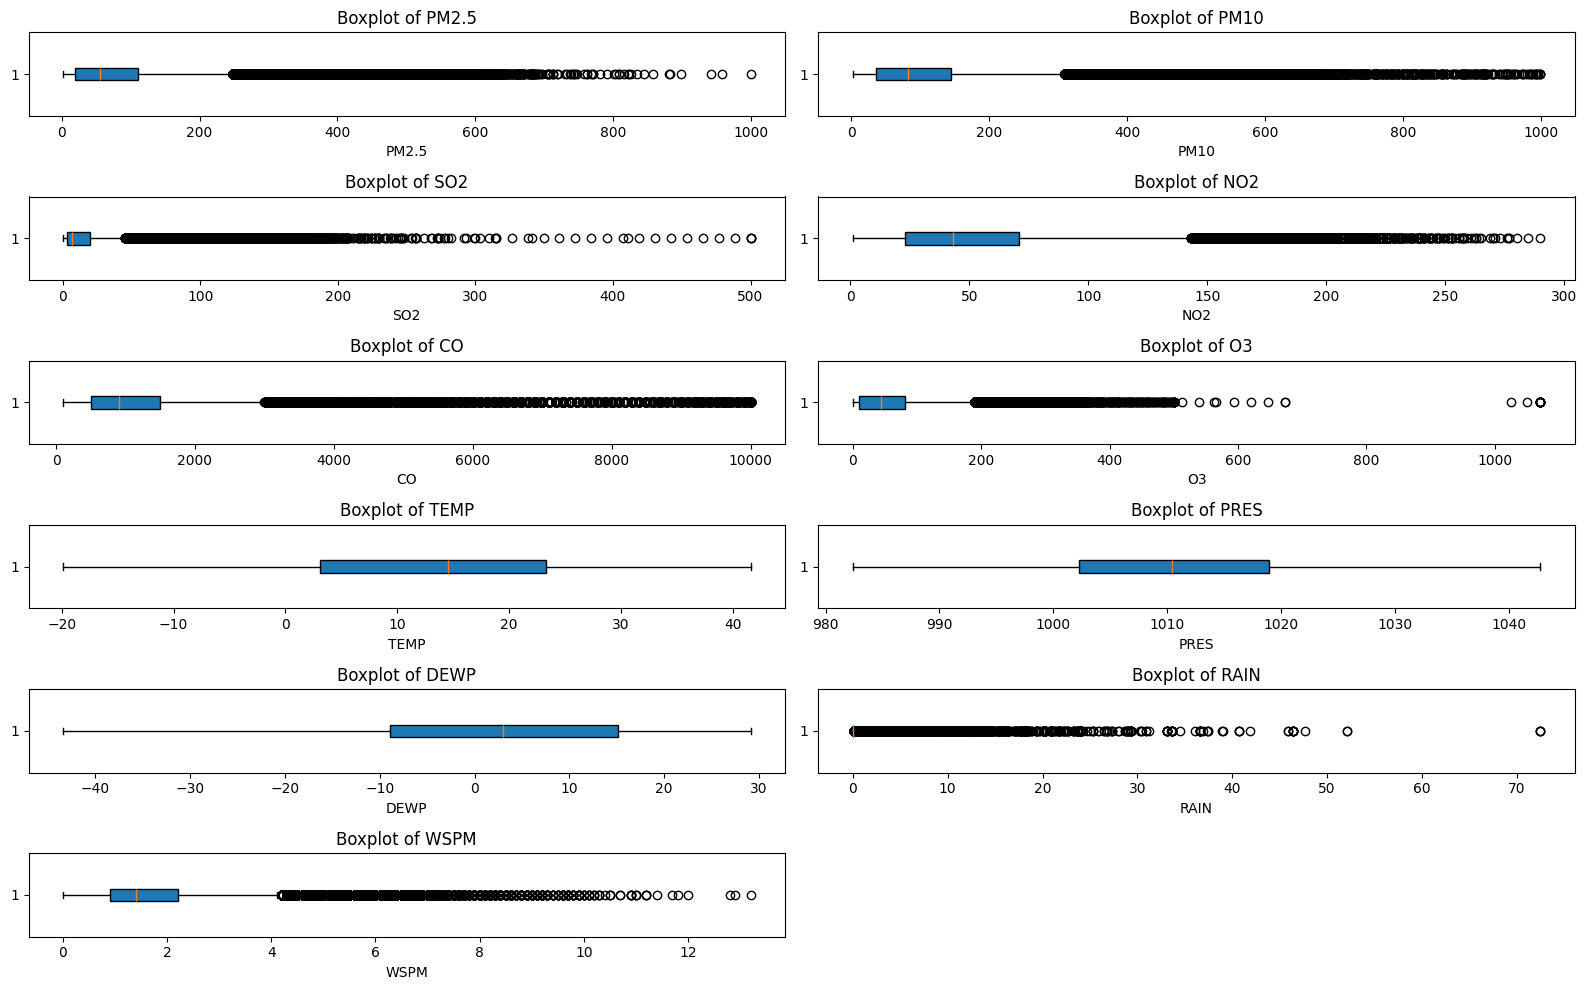

In [48]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns ,1):
    plt.subplot(6, 2, i)
    plt.boxplot(all_data[col], vert=False, patch_artist=True)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [49]:
def detect_outliers_iqr(X,col):
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    #print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print(lwr_bound, upr_bound)

    # Identify rows where values are below the lower bound
    outliers_below = X[X[col] < lwr_bound]

   # Identify rows where values are above the upper bound
    outliers_above = X[X[col] > upr_bound]

   # Combine both sets of outliers into a single DataFrame
    outliers = pd.concat([outliers_below, outliers_above])
    return outliers

In [50]:
outlier_summary = {}
for col in numerical_columns:
    outliers_col = detect_outliers_iqr(all_data,col)
    outlier_summary[col] = len(outliers_col)

for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")

PM2.5: 19612 outliers
PM10: 15150 outliers
SO2: 36626 outliers
NO2: 7255 outliers
CO: 29224 outliers
O3: 16662 outliers
TEMP: 0 outliers
PRES: 0 outliers
DEWP: 0 outliers
RAIN: 16527 outliers
WSPM: 23124 outliers


In [51]:
def handle_outliers_iqr(X,col):
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    #print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    # Cap outliers to the lower and upper bounds
    X[col] = X[col].clip(lower=lwr_bound, upper=upr_bound)

In [52]:
for col in numerical_columns:
    if col != 'RAIN':
        handle_outliers_iqr(all_data, col)
print("Outliers handled (excluding 'rain'). Summary of updated data:")
all_data[numerical_columns].describe().T

Outliers handled (excluding 'rain'). Summary of updated data:


,count,mean,std,min,25%,50%,75%,max
PM2.5,420768.0,76.056150,68.208418,2.0000,20.0,55.0,111.0,247.50
PM10,420768.0,101.463990,80.093069,2.0000,36.0,82.0,145.0,308.50
SO2,420768.0,13.529880,14.049653,0.2856,3.0,7.0,20.0,45.50
NO2,420768.0,50.199997,33.856014,1.0265,23.0,43.0,71.0,143.00
CO,420768.0,1131.529229,818.445530,100.0000,500.0,900.0,1500.0,3000.00
O3,420768.0,55.590392,51.701952,0.2142,10.0,44.0,82.0,190.00
TEMP,420768.0,13.531692,11.437867,-19.9000,3.1,14.5,23.3,41.60
PRES,420768.0,1010.753337,10.474302,982.4000,1002.3,1010.4,1019.0,1042.80
DEWP,420768.0,2.482421,13.797675,-43.4000,-8.9,3.0,15.1,29.10
RAIN,420768.0,0.064428,0.820638,0.0000,0.0,0.0,0.0,72.50


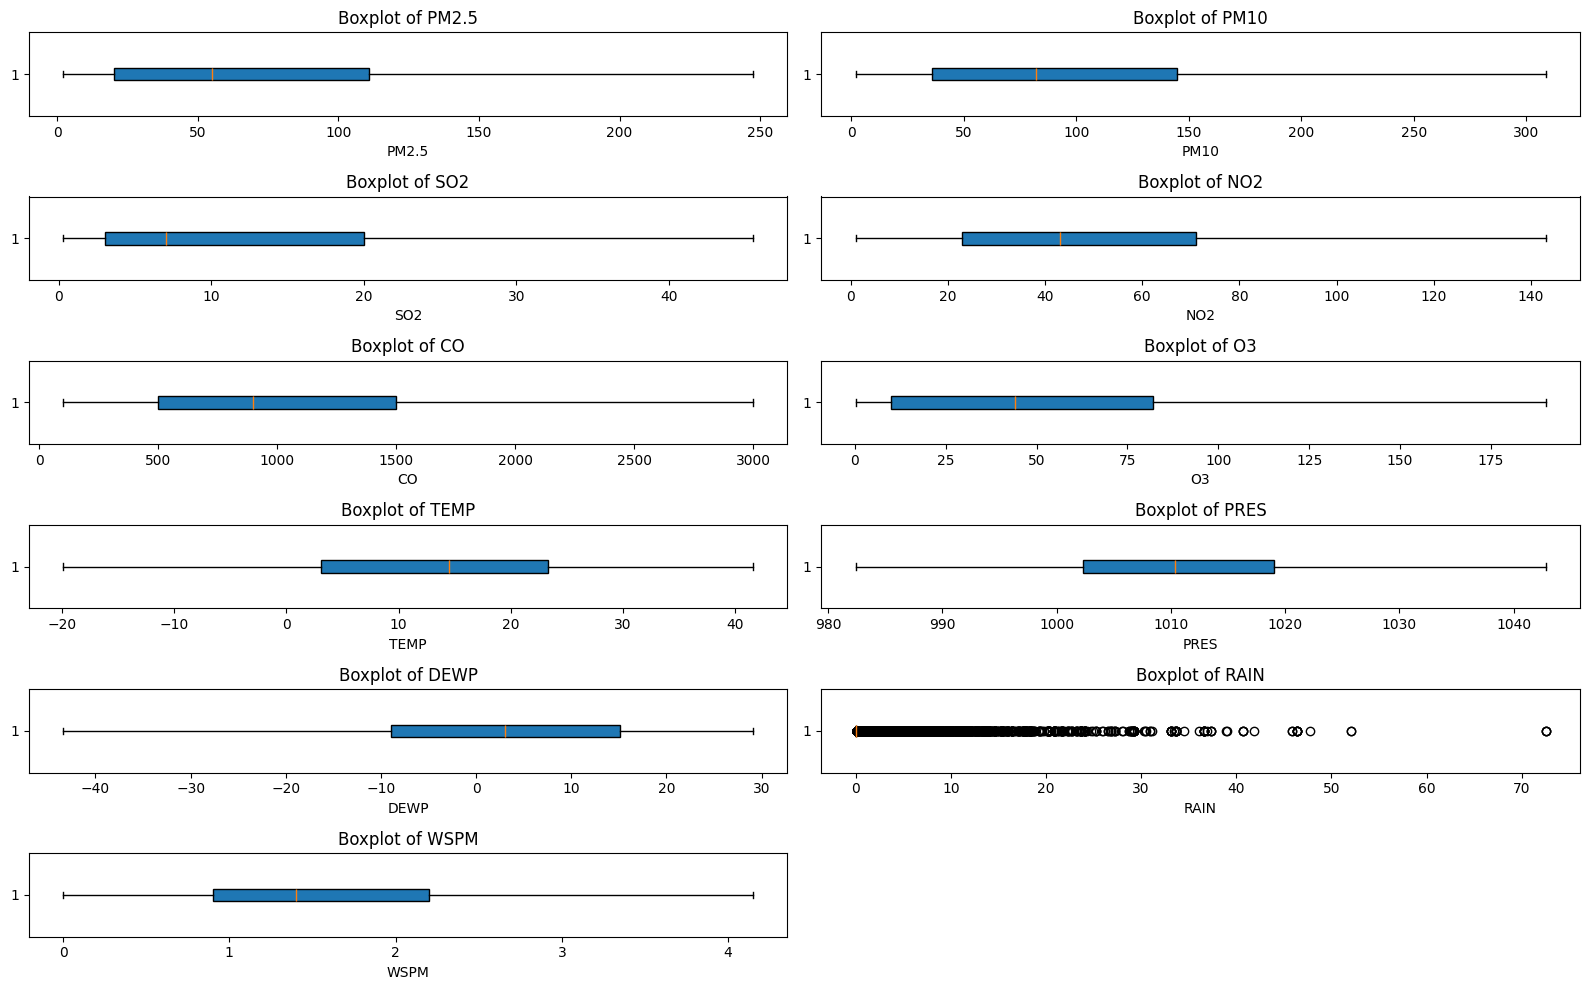

In [53]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns ,1):
    plt.subplot(6, 2, i)
    plt.boxplot(all_data[col], vert=False, patch_artist=True)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [54]:
Preprocessed_AIQ = all_data.copy()
Preprocessed_AIQ


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Air_Quality_Index,date
0,2013,3,1,2013,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.15,Guanyuan,Heavily Polluted,1/3/2013
1,2013,3,1,2013,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.15,Guanyuan,Heavily Polluted,1/3/2013
2,2013,3,1,2013,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,4.15,Guanyuan,Heavily Polluted,1/3/2013
3,2013,3,1,2013,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.10,Guanyuan,Severely Polluted,1/3/2013
4,2013,3,1,2013,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.00,Guanyuan,Severely Polluted,1/3/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,2017,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.30,Dingling,Lightly Polluted,28/2/2017
420764,2017,2,28,2017,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.10,Dingling,Lightly Polluted,28/2/2017
420765,2017,2,28,2017,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.50,Dingling,Lightly Polluted,28/2/2017
420766,2017,2,28,2017,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.40,Dingling,Lightly Polluted,28/2/2017


In [55]:
#code to save as csv file

Preprocessed_AIQ.to_csv('preprocessed_air_quality_data.csv', index=False)

In [62]:
# Select only numeric columns for correlation calculation
numeric_data = all_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Print or display the correlation matrix
print(correlation_matrix)

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.888628  0.507475  0.660837  0.789284 -0.164389 -0.107348   
PM10   0.888628  1.000000  0.502866  0.664306  0.707056 -0.127217 -0.077798   
SO2    0.507475  0.502866  1.000000  0.531292  0.600356 -0.185770 -0.361299   
NO2    0.660837  0.664306  0.531292  1.000000  0.720544 -0.504846 -0.280473   
CO     0.789284  0.707056  0.600356  0.720544  1.000000 -0.362721 -0.315692   
O3    -0.164389 -0.127217 -0.185770 -0.504846 -0.362721  1.000000  0.607358   
TEMP  -0.107348 -0.077798 -0.361299 -0.280473 -0.315692  0.607358  1.000000   
PRES  -0.001559 -0.035322  0.259181  0.180019  0.180335 -0.457512 -0.813312   
DEWP   0.148153  0.096129 -0.309283 -0.031969 -0.023402  0.313469  0.820247   
RAIN  -0.013970 -0.028338 -0.049438 -0.044452 -0.010189  0.027079  0.037647   
WSPM  -0.302070 -0.226342 -0.110734 -0.419536 -0.355250  0.344329  0.057575   

           PRES      DEWP      RAIN      WSPM  
PM2

In [63]:
numeric_data.corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.888628,0.507475,0.660837,0.789284,-0.164389,-0.107348,-0.001559,0.148153,-0.013970,-0.302070
PM10,0.888628,1.000000,0.502866,0.664306,0.707056,-0.127217,-0.077798,-0.035322,0.096129,-0.028338,-0.226342
SO2,0.507475,0.502866,1.000000,0.531292,0.600356,-0.185770,-0.361299,0.259181,-0.309283,-0.049438,-0.110734
NO2,0.660837,0.664306,0.531292,1.000000,0.720544,-0.504846,-0.280473,0.180019,-0.031969,-0.044452,-0.419536
CO,0.789284,0.707056,0.600356,0.720544,1.000000,-0.362721,-0.315692,0.180335,-0.023402,-0.010189,-0.355250
O3,-0.164389,-0.127217,-0.185770,-0.504846,-0.362721,1.000000,0.607358,-0.457512,0.313469,0.027079,0.344329
TEMP,-0.107348,-0.077798,-0.361299,-0.280473,-0.315692,0.607358,1.000000,-0.813312,0.820247,0.037647,0.057575
PRES,-0.001559,-0.035322,0.259181,0.180019,0.180335,-0.457512,-0.813312,1.000000,-0.750271,-0.060952,0.061374
DEWP,0.148153,0.096129,-0.309283,-0.031969,-0.023402,0.313469,0.820247,-0.750271,1.000000,0.086259,-0.287514
RAIN,-0.013970,-0.028338,-0.049438,-0.044452,-0.010189,0.027079,0.037647,-0.060952,0.086259,1.000000,0.020462


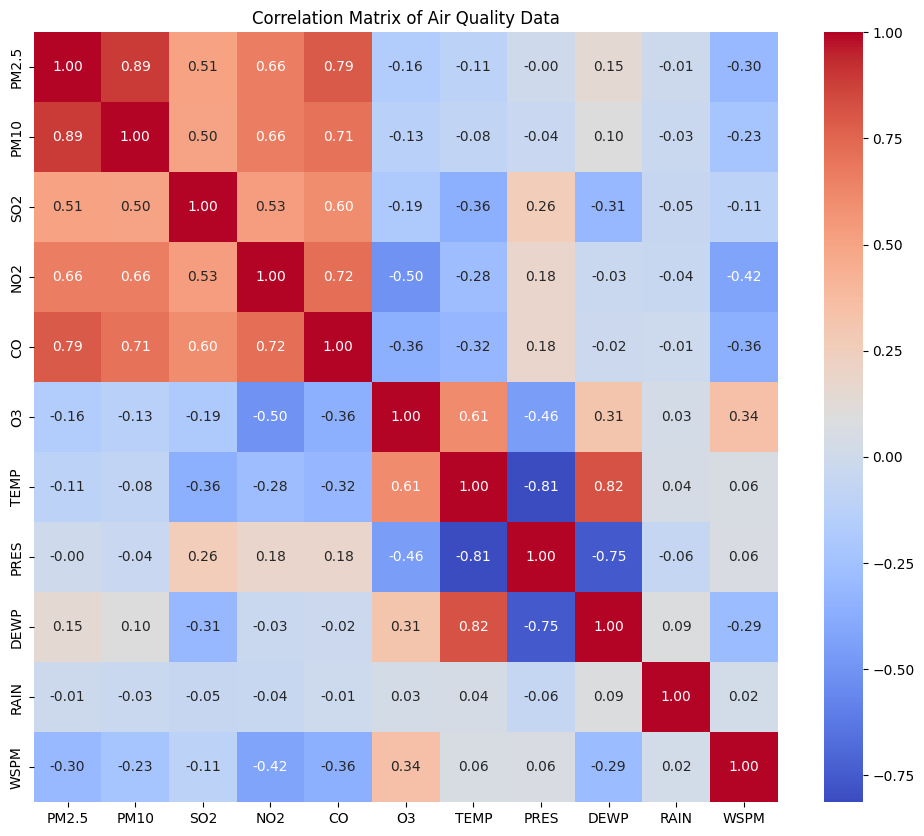

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality Data')
plt.show()

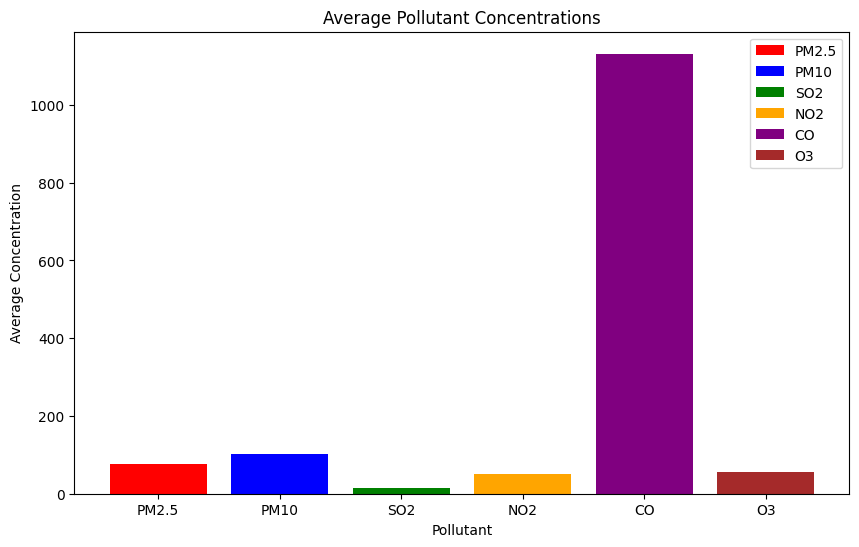

In [65]:

import matplotlib.pyplot as plt

# Assuming 'all_data' DataFrame is already created and available

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']  # Different colors for pollutants

plt.figure(figsize=(10, 6))

for i, pollutant in enumerate(pollutants):
    plt.bar(pollutant, all_data[pollutant].mean(), color=colors[i], label=pollutant)

plt.xlabel('Pollutant')
plt.ylabel('Average Concentration')
plt.title('Average Pollutant Concentrations')
plt.legend()
plt.show()

<ipython-input-66-3e16f5319415>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Air_Quality_Index', data=all_data, palette=colors)


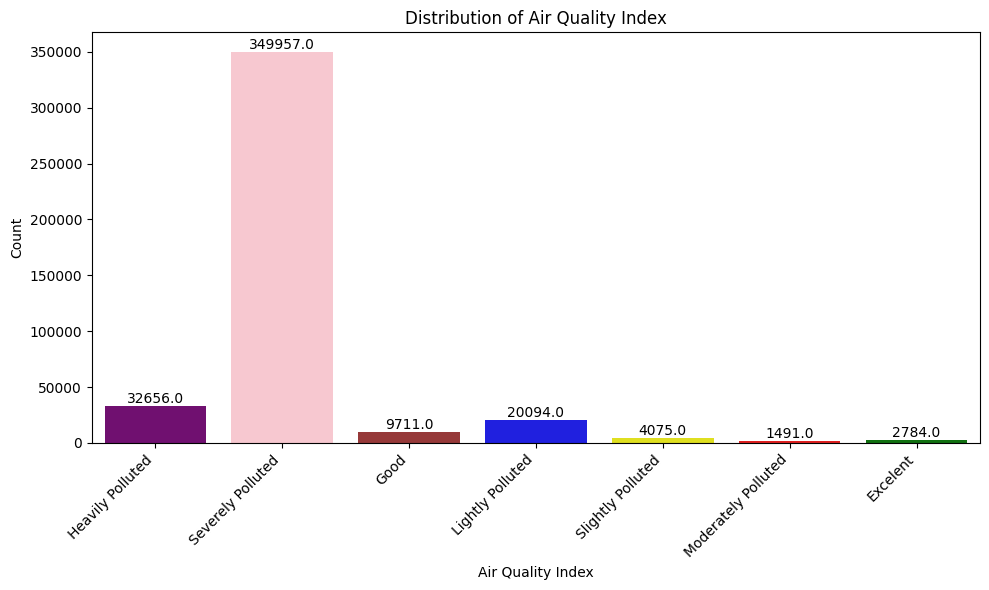

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'all_data' is your DataFrame
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Define custom colors for each AQI category
colors = {
    'Excelent': 'green',
    'Good': 'brown',
    'Slightly Polluted': 'yellow',
    'Lightly Polluted': 'blue',
    'Moderately Polluted': 'red',
    'Heavily Polluted': 'purple',
    'Severely Polluted': 'pink'
}

# Create the countplot with custom colors
ax = sns.countplot(x='Air_Quality_Index', data=all_data, palette=colors)
plt.title('Distribution of Air Quality Index')
plt.xlabel('Air Quality Index')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add count labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

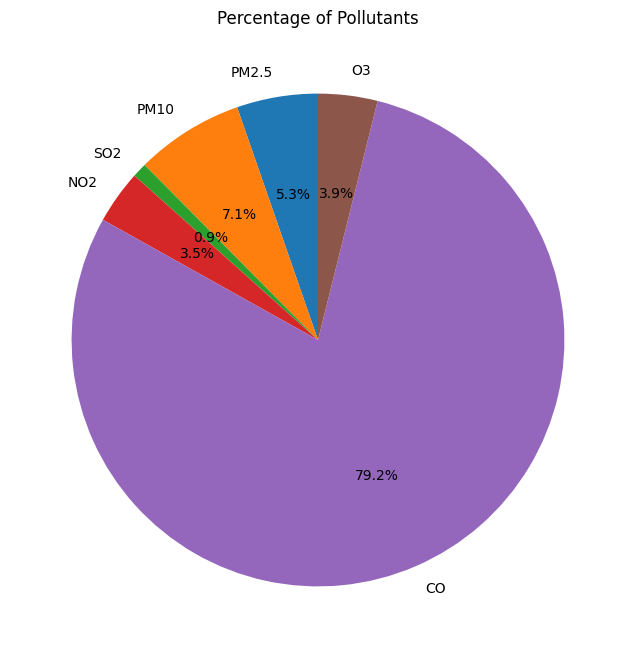

In [67]:
import matplotlib.pyplot as plt

# Assuming 'all_data' is your DataFrame
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
total_pollutant_concentration = all_data[pollutants].sum().sum()  # Calculates total concentration across all pollutants

# Calculate percentage for each pollutant
pollutant_percentages = [(all_data[pollutant].sum() / total_pollutant_concentration) * 100 for pollutant in pollutants]

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(pollutant_percentages, labels=pollutants, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Pollutants')
plt.show()

use grid search
use 2 parameter,then 3 ,4

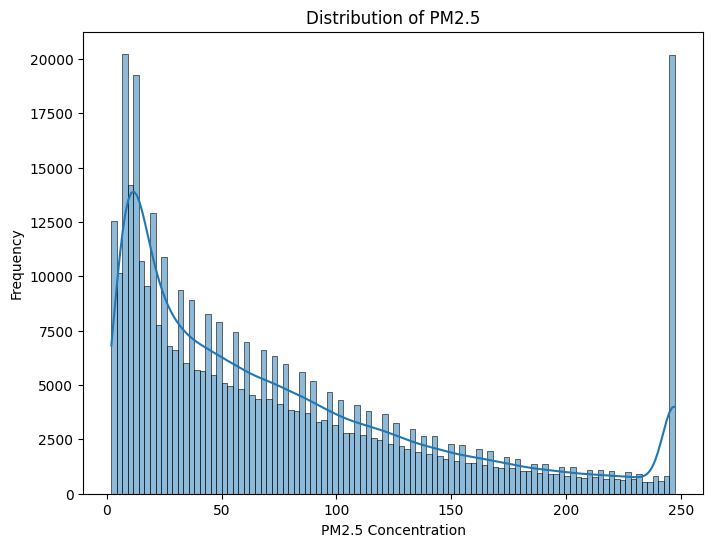

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(all_data['PM2.5'], kde=True)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.show()

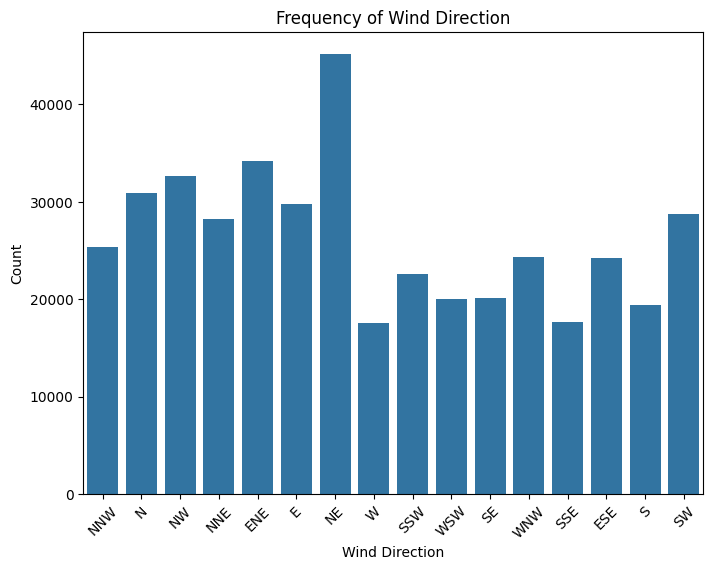

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(x=all_data['wd'])
plt.title('Frequency of Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**bivarite analysis**

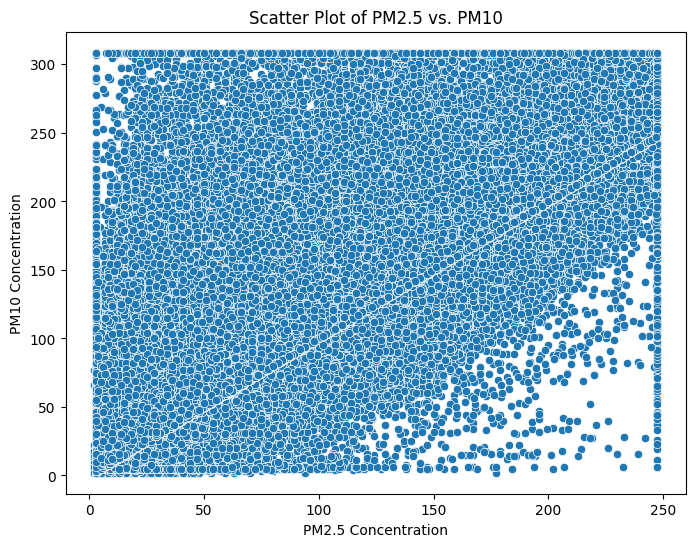

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=all_data['PM2.5'], y=all_data['PM10'])
plt.title('Scatter Plot of PM2.5 vs. PM10')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('PM10 Concentration')
plt.show()

In [71]:
correlation = all_data['PM2.5'].corr(all_data['PM10'])  # Replace with your columns
print(f"Correlation between PM2.5 and PM10: {correlation}")

Correlation between PM2.5 and PM10: 0.8886283844195401


In [72]:
cross_tab = pd.crosstab(all_data['station'], all_data['Air_Quality_Index'])
print(cross_tab.to_string())

Air_Quality_Index  Excelent  Good  Heavily Polluted  Lightly Polluted  Moderately Polluted  Severely Polluted  Slightly Polluted
station                                                                                                                         
Aotizhongxin            203   473              2590              1419                  117              29992                270
Changping               181   655              2809              1419                  111              29640                249
Dingling                313  1739              3696              4221                  142              24415                538
Dongsi                  379  1083              2502              1393                  256              28825                626
Guanyuan                267   873              2370              1353                  124              29694                383
Gucheng                 126   602              2640               957                  107       

** Multivariate Analysis**

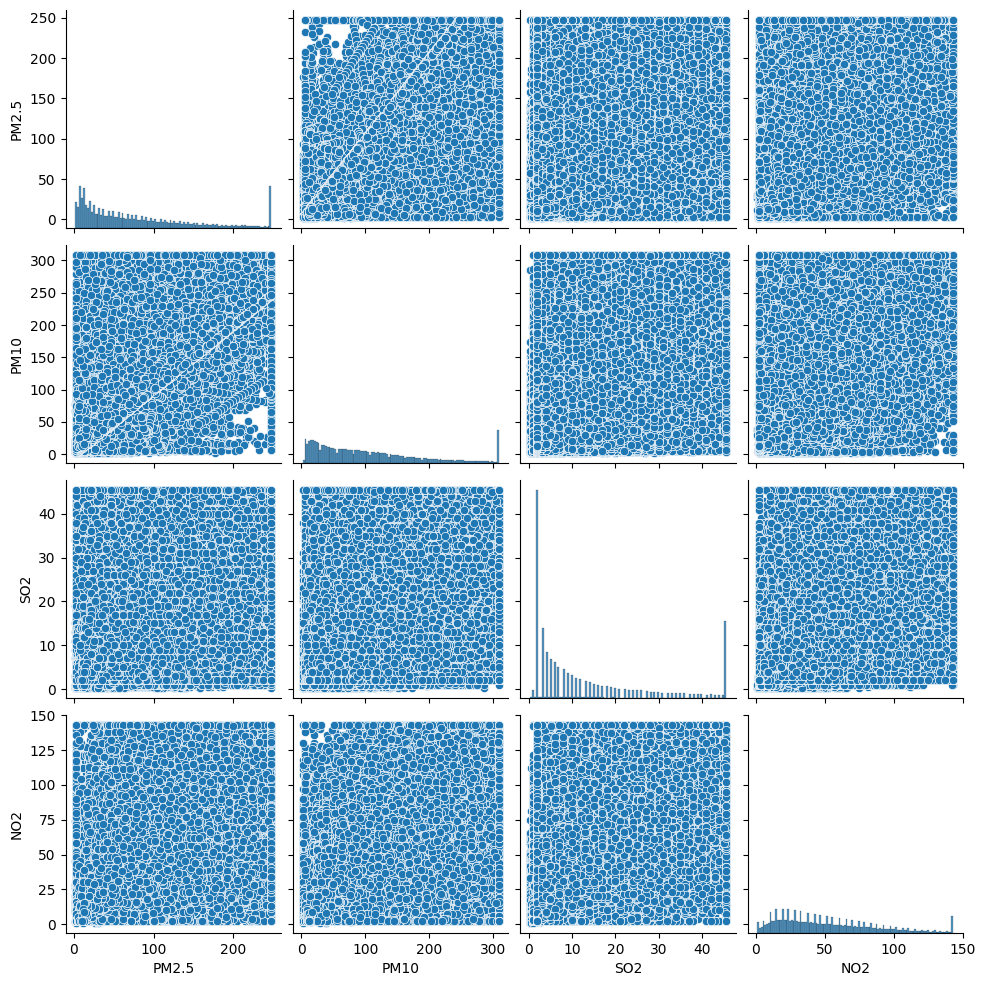

In [73]:
sns.pairplot(all_data[['PM2.5', 'PM10', 'SO2', 'NO2']])
plt.show()

**Heatmap: Visualize the correlation matrix of multiple numerical variables**

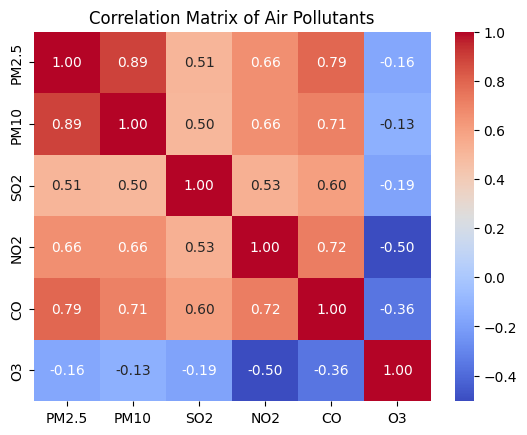

In [74]:
correlation_matrix = all_data[['PM2.5', 'PM10', 'SO2', 'NO2','CO', 'O3']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Pollutants')
plt.show()

**Multivariate analysis :**

In [75]:
import seaborn as sns

# Select numerical columns for analysis-
numerical_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
# Customize the plot if needed (e.g., hue='Air_Quality_Index' to color by category)
sns.pairplot(all_data[numerical_cols])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

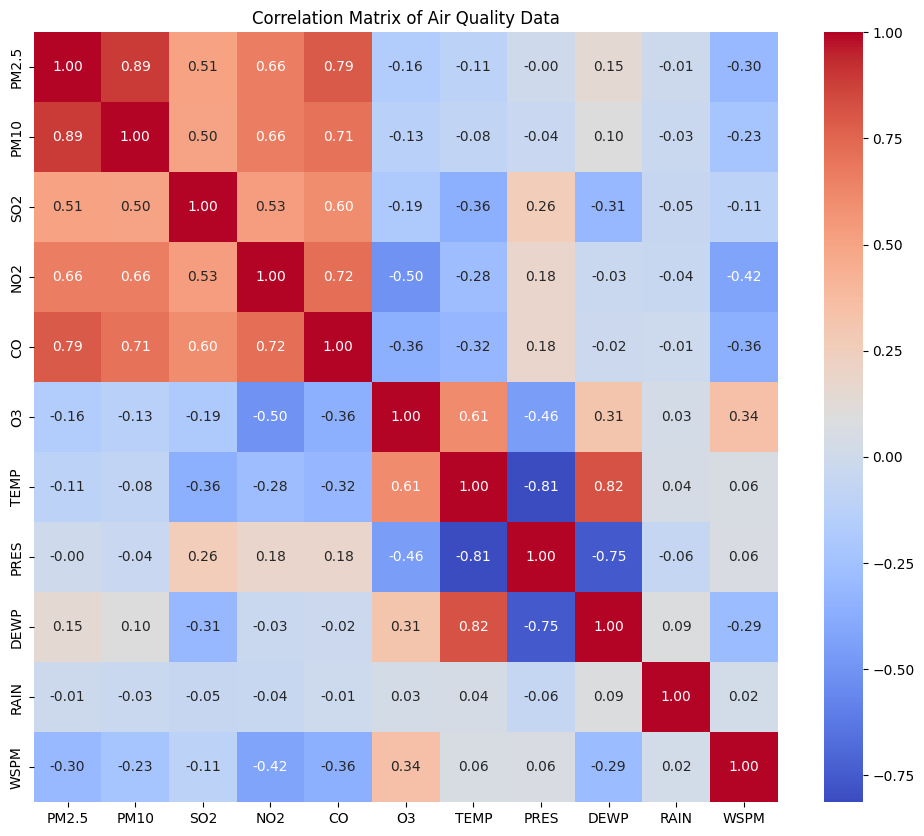

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = all_data[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 10))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality Data')
plt.show()

<ipython-input-77-8df85de62963>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pm25_correlation.values, y=pm25_correlation.index, palette='coolwarm')


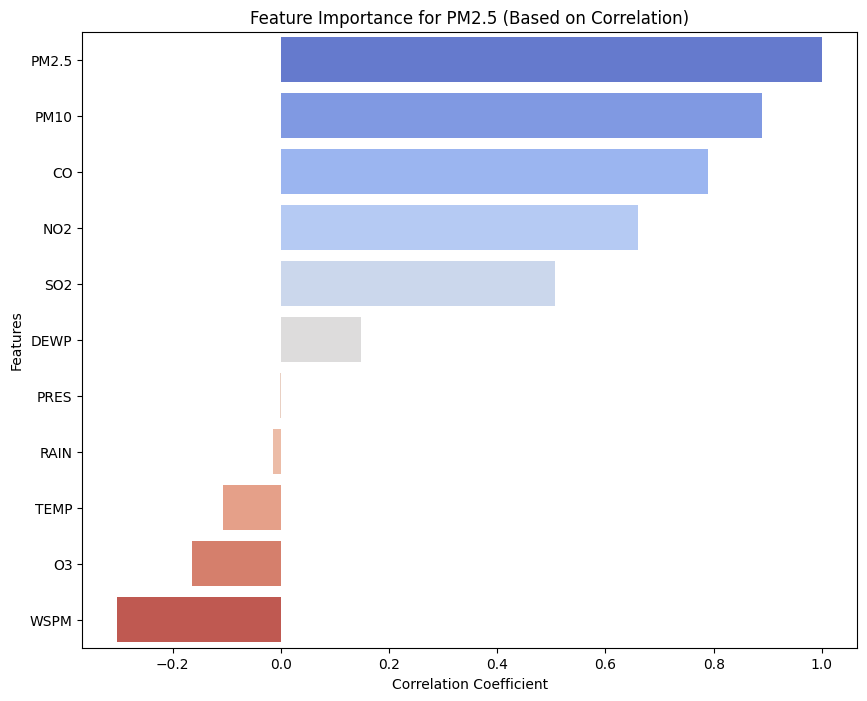

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation of all features with PM2.5
pm25_correlation = all_data[numerical_cols].corr()['PM2.5'].sort_values(ascending=False)

# Plot feature importance based on correlation
plt.figure(figsize=(10, 8))
sns.barplot(x=pm25_correlation.values, y=pm25_correlation.index, palette='coolwarm')
plt.title('Feature Importance for PM2.5 (Based on Correlation)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [ ]:
#Feature Importance

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [79]:
categorical_cols = all_data.select_dtypes(include=['object', 'category']).columns
numerical_cols = all_data.select_dtypes(include=['int64', 'float64']).columns

In [80]:
categorical_cols

Index(['year', 'month', 'day', 'hour', 'wd', 'station', 'Air_Quality_Index',
       'date'],
      dtype='object')

In [81]:
numerical_cols

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM'],
      dtype='object')

In [82]:
# Encode categorical variables
label_encoded_data = all_data.copy()
label_encoders = {}

for column in categorical_cols:
        le = LabelEncoder()
        label_encoded_data[column] = le.fit_transform(label_encoded_data[column])
        label_encoders[column] = le

In [83]:
# Normalize numerical variables
scaler = MinMaxScaler()
normalized_data = label_encoded_data.copy()
normalized_data[numerical_cols] = scaler.fit_transform(normalized_data[numerical_cols])

In [84]:
normalized_data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Air_Quality_Index,date
0,0,5,0,0,0.008147,0.006525,0.303319,0.133641,0.068966,0.362439,0.312195,0.672185,0.339310,0.0,6,1.000000,4,2,20
1,0,5,0,0,0.008147,0.006525,0.281202,0.112510,0.068966,0.378246,0.305691,0.675497,0.347586,0.0,3,1.000000,4,2,20
2,0,5,0,0,0.004073,0.003263,0.214852,0.126598,0.068966,0.362439,0.305691,0.680464,0.347586,0.0,6,1.000000,4,2,20
3,0,5,0,0,0.004073,0.013051,0.148501,0.161815,0.103448,0.325555,0.300813,0.697020,0.331034,0.0,7,0.746988,4,5,20
4,0,5,0,0,0.004073,0.013051,0.104268,0.091380,0.103448,0.372977,0.291057,0.708609,0.329655,0.0,3,0.481928,4,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,4,4,20,4,0.036660,0.029364,0.037917,0.006857,0.034483,0.520512,0.513821,0.438742,0.415172,0.0,5,0.313253,2,3,979
420764,4,4,20,4,0.044807,0.035889,0.037917,0.006857,0.034483,0.531050,0.500813,0.440397,0.405517,0.0,3,0.506024,2,3,979
420765,4,4,20,4,0.028513,0.039152,0.037917,0.006857,0.034483,0.536319,0.478049,0.447020,0.419310,0.0,3,0.361446,2,3,979
420766,4,4,20,4,0.032587,0.032626,0.037917,0.006857,0.034483,0.509974,0.450407,0.450331,0.424828,0.0,7,0.337349,2,3,979


              Feature  Importance
4                PM10    0.787982
7                  CO    0.093430
11               DEWP    0.023347
6                 NO2    0.010727
1               month    0.010660
17               date    0.010232
5                 SO2    0.010193
9                TEMP    0.010021
10               PRES    0.009462
8                  O3    0.007703
14               WSPM    0.005529
15            station    0.005083
2                 day    0.004245
13                 wd    0.003602
0                year    0.003107
3                hour    0.003079
16  Air_Quality_Index    0.001096
12               RAIN    0.000504


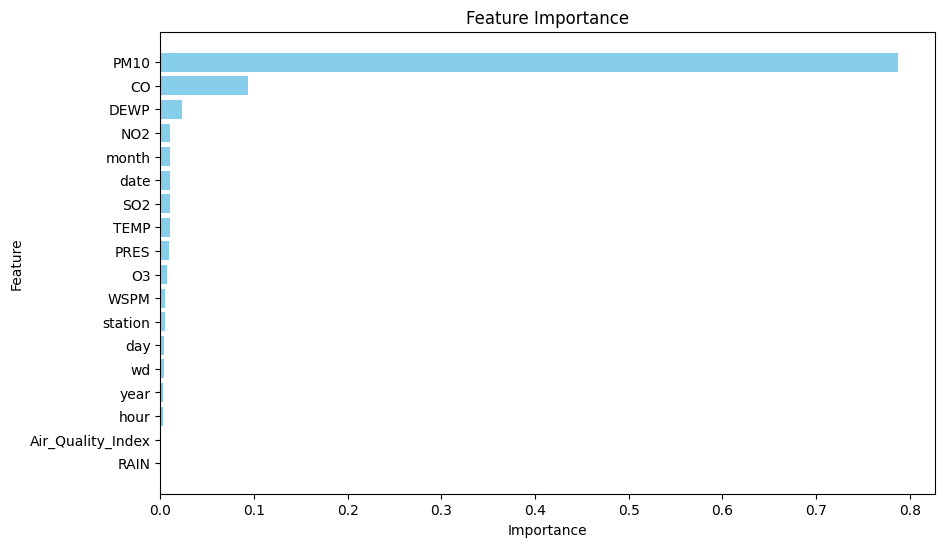

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# ... (Your existing code for data preprocessing) ...

# Separate features and target
X = normalized_data.drop("PM2.5", axis=1)  # Replace 'target_column' with your target variable name
y = normalized_data["PM2.5"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor # Changed to Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42) # Changed to Regressor
model.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
})

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Display top features
print(feature_importances)

# Optional: Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

In [86]:
print(feature_importances)

              Feature  Importance
4                PM10    0.787982
7                  CO    0.093430
11               DEWP    0.023347
6                 NO2    0.010727
1               month    0.010660
17               date    0.010232
5                 SO2    0.010193
9                TEMP    0.010021
10               PRES    0.009462
8                  O3    0.007703
14               WSPM    0.005529
15            station    0.005083
2                 day    0.004245
13                 wd    0.003602
0                year    0.003107
3                hour    0.003079
16  Air_Quality_Index    0.001096
12               RAIN    0.000504


In [87]:
# Calculate percentage for each feature
feature_importances['Percentage'] = (feature_importances['Importance'] / feature_importances['Importance'].sum()) * 100

# Display the updated DataFrame with percentages
print(feature_importances)



              Feature  Importance  Percentage
4                PM10    0.787982   78.798231
7                  CO    0.093430    9.342980
11               DEWP    0.023347    2.334743
6                 NO2    0.010727    1.072722
1               month    0.010660    1.066008
17               date    0.010232    1.023177
5                 SO2    0.010193    1.019299
9                TEMP    0.010021    1.002057
10               PRES    0.009462    0.946181
8                  O3    0.007703    0.770253
14               WSPM    0.005529    0.552874
15            station    0.005083    0.508282
2                 day    0.004245    0.424487
13                 wd    0.003602    0.360212
0                year    0.003107    0.310663
3                hour    0.003079    0.307884
16  Air_Quality_Index    0.001096    0.109582
12               RAIN    0.000504    0.050363


In [88]:

low_feature_importance_columns = ['RAIN', 'Air_Quality_Index', 'wd', 'WSPM', 'hour','TEMP','PRES','date']

# Check if all columns exist before dropping
for col in low_feature_importance_columns:
    if col not in all_data.columns:
        print(f"Column '{col}' not found in all_data. Please check the column names.")

# Drop the columns
all_data_reduced = all_data.drop(columns=low_feature_importance_columns, errors='ignore')

In [89]:
all_data_reduced

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,DEWP,station
0,2013,3,1,4.0,4.0,14.0,20.0,300.0,69.0,-18.8,Guanyuan
1,2013,3,1,4.0,4.0,13.0,17.0,300.0,72.0,-18.2,Guanyuan
2,2013,3,1,3.0,3.0,10.0,19.0,300.0,69.0,-18.2,Guanyuan
3,2013,3,1,3.0,6.0,7.0,24.0,400.0,62.0,-19.4,Guanyuan
4,2013,3,1,3.0,6.0,5.0,14.0,400.0,71.0,-19.5,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,11.0,11.0,2.0,2.0,200.0,99.0,-13.3,Dingling
420764,2017,2,28,13.0,13.0,2.0,2.0,200.0,101.0,-14.0,Dingling
420765,2017,2,28,9.0,14.0,2.0,2.0,200.0,102.0,-13.0,Dingling
420766,2017,2,28,10.0,12.0,2.0,2.0,200.0,97.0,-12.6,Dingling


In [90]:
all_data_reduced['year'].value_counts()

,count
year,
2016,105408
2014,105120
2015,105120
2013,88128
2017,16992


In [91]:
import joblib # Import the joblib library


In [ ]:
# prompt: write code to find joblib version

import joblib
joblib.__version__

'1.4.2'

In [ ]:
  #encoders = {}
  #encode_column = ['station']

  #for column in encode_column:
    #encoder = LabelEncoder()
    #all_data_reduced[column] = encoder.fit_transform(all_data_reduced[column])
    #encoders[column] = encoder
    #joblib.dump(encoder, f'{column}_encoder.pkl')  # Save encoder


In [92]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [93]:
# Encode the 'station' column
station_encoder = LabelEncoder()
all_data_reduced['station'] = station_encoder.fit_transform(all_data['station'])

In [94]:

# Save the 'station' encoder
joblib.dump(station_encoder, 'station_encoder.pkl')

['station_encoder.pkl']

In [95]:
# Split the data into training (10 stations) and testing (2 stations)
stations = all_data_reduced['station'].unique()
train_stations = stations[:10]
test_stations = stations[10:]

In [96]:
train_data = all_data_reduced[all_data_reduced['station'].isin(train_stations)]
test_data = all_data_reduced[all_data_reduced['station'].isin(test_stations)]

In [97]:
# Define the training and testing sets
X_train = train_data.drop(columns=['PM2.5'])
y_train = train_data['PM2.5']
X_test = test_data.drop(columns=['PM2.5'])
y_test = test_data['PM2.5']

In [98]:
X_test

,year,month,day,PM10,SO2,NO2,CO,O3,DEWP,station
350640,2013,3,1,18.0,5.0,36.428571,800.0,88.0,-18.6,5
350641,2013,3,1,15.0,5.0,34.857143,800.0,88.0,-19.0,5
350642,2013,3,1,18.0,5.5,33.285714,700.0,52.0,-19.8,5
350643,2013,3,1,20.0,6.0,31.714286,650.0,62.5,-21.2,5
350644,2013,3,1,17.0,5.0,30.142857,600.0,73.0,-21.4,5
...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,11.0,2.0,2.000000,200.0,99.0,-13.3,2
420764,2017,2,28,13.0,2.0,2.000000,200.0,101.0,-14.0,2
420765,2017,2,28,14.0,2.0,2.000000,200.0,102.0,-13.0,2
420766,2017,2,28,12.0,2.0,2.000000,200.0,97.0,-12.6,2


In [99]:
y_test

,PM2.5
350640,6.0
350641,6.0
350642,5.0
350643,6.0
350644,5.0
...,...
420763,11.0
420764,13.0
420765,9.0
420766,10.0


In [100]:
y_train

,PM2.5
0,4.0
1,4.0
2,3.0
3,3.0
4,3.0
...,...
350635,11.0
350636,13.0
350637,14.0
350638,12.0


In [101]:
X_train

,year,month,day,PM10,SO2,NO2,CO,O3,DEWP,station
0,2013,3,1,4.0,14.0,20.0,300.0,69.0,-18.8,4
1,2013,3,1,4.0,13.0,17.0,300.0,72.0,-18.2,4
2,2013,3,1,3.0,10.0,19.0,300.0,69.0,-18.2,4
3,2013,3,1,6.0,7.0,24.0,400.0,62.0,-19.4,4
4,2013,3,1,6.0,5.0,14.0,400.0,71.0,-19.5,4
...,...,...,...,...,...,...,...,...,...,...
350635,2017,2,28,32.0,3.0,24.0,400.0,72.0,-16.2,11
350636,2017,2,28,32.0,3.0,41.0,500.0,50.0,-15.1,11
350637,2017,2,28,28.0,4.0,38.0,500.0,54.0,-13.3,11
350638,2017,2,28,23.0,4.0,30.0,400.0,59.0,-12.9,11


In [102]:
# Using train_test_split on the training data (to further split it)
# Now we will split the training data into a smaller train and validation set
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [103]:
from sklearn.metrics import mean_squared_error

In [ ]:
#Linear Regression

In [104]:
# Initialize and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_split, y_train_split)

# Evaluate the model on the validation set
val_predictions_linear = linear_model.predict(X_val_split)
val_mse_linear = mean_squared_error(y_val_split, val_predictions_linear)
val_r2_linear = r2_score(y_val_split, val_predictions_linear)
val_mae = mean_absolute_error(y_test, val_predictions_linear)

# Print validation performance for Linear Regression
print(f"Linear Regression - Validation Set Performance:")
print(f"Mean Squared Error: {val_mse_linear:.4f}")
print(f"R² Score: {val_r2_linear:.4f}")
print(f"Mean Absolute Error: {val_mae:.4f}")

# Train the Linear Regression model on the entire training dataset
linear_model.fit(X_train, y_train)

# Make predictions on the test set using the trained Linear Regression model
test_predictions_linear = linear_model.predict(X_test)

# Evaluate the Linear Regression model's performance on the test set
test_mse_linear = mean_squared_error(y_test, test_predictions_linear)
test_r2_linear = r2_score(y_test, test_predictions_linear)
mae = mean_absolute_error(y_test, test_predictions_linear)

# Print test set performance for Linear Regression
print(f"\nLinear Regression - Test Set Performance:")
print(f"Mean Squared Error: {test_mse_linear:.4f}")
print(f"R² Score: {test_r2_linear:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

Linear Regression - Validation Set Performance:
Mean Squared Error: 669.5074
R² Score: 0.8575
Mean Absolute Error: 71.5339

Linear Regression - Test Set Performance:
Mean Squared Error: 788.7246
R² Score: 0.8249
Mean Absolute Error: 19.6158


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
#Decision Tree Regressor

In [106]:
# Initialize and train a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)  # You can tune hyperparameters here
dt_model.fit(X_train_split, y_train_split)

# Evaluate the model on the validation set
val_predictions_dt = dt_model.predict(X_val_split)
val_mse_dt = mean_squared_error(y_val_split, val_predictions_dt)
val_r2_dt = r2_score(y_val_split, val_predictions_dt)

# Print validation performance for Decision Tree Regressor
print(f"Decision Tree Regressor - Validation Set Performance:")
print(f"Mean Squared Error: {val_mse_dt:.4f}")
print(f"R² Score: {val_r2_dt:.4f}")

# Train the Decision Tree Regressor model on the entire training dataset
dt_model.fit(X_train, y_train)

# Make predictions on the test set using the trained Decision Tree Regressor model
test_predictions_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree Regressor model's performance on the test set
test_mse_dt = mean_squared_error(y_test, test_predictions_dt)
test_r2_dt = r2_score(y_test, test_predictions_dt)

# Print test set performance for Decision Tree Regressor
print(f"\nDecision Tree Regressor - Test Set Performance:")
print(f"Mean Squared Error: {test_mse_dt:.4f}")
print(f"R² Score: {test_r2_dt:.4f}")

Decision Tree Regressor - Validation Set Performance:
Mean Squared Error: 490.4749
R² Score: 0.8956

Decision Tree Regressor - Test Set Performance:
Mean Squared Error: 769.3990
R² Score: 0.8292


In [ ]:
#KNeighboursRegressor

In [107]:


from sklearn.neighbors import KNeighborsRegressor


# Initialize and train a KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune the number of neighbors (n_neighbors)
knn_model.fit(X_train_split, y_train_split)

# Evaluate the model on the validation set
val_predictions_knn = knn_model.predict(X_val_split)
val_mse_knn = mean_squared_error(y_val_split, val_predictions_knn)
val_r2_knn = r2_score(y_val_split, val_predictions_knn)

# Print validation performance for KNN Regressor
print(f"KNN Regressor - Validation Set Performance:")
print(f"Mean Squared Error: {val_mse_knn:.4f}")
print(f"R² Score: {val_r2_knn:.4f}")

# Train the KNN Regressor model on the entire training dataset
knn_model.fit(X_train, y_train)

# Make predictions on the test set using the trained KNN Regressor model
test_predictions_knn = knn_model.predict(X_test)

# Evaluate the KNN Regressor model's performance on the test set
test_mse_knn = mean_squared_error(y_test, test_predictions_knn)
test_r2_knn = r2_score(y_test, test_predictions_knn)

# Print test set performance for KNN Regressor
print(f"\nKNN Regressor - Test Set Performance:")
print(f"Mean Squared Error: {test_mse_knn:.4f}")
print(f"R² Score: {test_r2_knn:.4f}")

KNN Regressor - Validation Set Performance:
Mean Squared Error: 464.2240
R² Score: 0.9012

KNN Regressor - Test Set Performance:
Mean Squared Error: 600.8208
R² Score: 0.8666


In [ ]:
#Random Forest Regressor

In [108]:
# Initialize and train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=10, random_state=42)

# Train the model on the training split
model.fit(X_train_split, y_train_split)

# Evaluate the model on the validation set
val_predictions = model.predict(X_val_split)

# Calculate performance metrics (MSE and R²) on the validation set
val_mse = mean_squared_error(y_val_split, val_predictions)
val_r2 = r2_score(y_val_split, val_predictions)

# Print validation performance
print(f"Validation Set Performance:")
print(f"Mean Squared Error: {val_mse:.4f}")
print(f"R² Score: {val_r2:.4f}")

# After validation, train the model on the entire training data (X_train, y_train)
model.fit(X_train, y_train)

# Make predictions on the test set (the data from the test city)
test_predictions = model.predict(X_test)

# Calculate performance metrics (MSE and R²) on the test set
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print test set performance
print(f"\nTest Set Performance:")
print(f"Mean Squared Error: {test_mse:.4f}")
print(f"R² Score: {test_r2:.4f}")

Validation Set Performance:
Mean Squared Error: 264.6895
R² Score: 0.9437

Test Set Performance:
Mean Squared Error: 432.0888
R² Score: 0.9041


In [109]:

import joblib

# Save the model to a file
#joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(model, "random_forest_model_compressed.pkl", compress=("gzip", 5))
print("Model saved with compression.")

Model saved with compression.


In [111]:
import pandas as pd
import numpy as np
import joblib

# Load the saved model
loaded_model = joblib.load('random_forest_model_compressed.pkl')
station_encoder = joblib.load('station_encoder.pkl')  # Load the encoder for 'station'

def predict_pm25(model, input_data, encoder):  # Pass the encoder as an argument
    """Predicts PM2.5 value using the loaded model and provided user input.

    Args:
        model: The trained RandomForestRegressor model.
        input_data: A dictionary containing user inputs for features.
        encoder: LabelEncoder for the 'station' column.

    Returns:
        The predicted PM2.5 value.
    """
    # Handle encoding for station using the provided encoder
    if 'station' in input_data:
        try:
            input_data['station'] = encoder.transform([input_data['station']])[0]
        except ValueError:
            print("Warning: Unseen station value. Using default encoding (0).")
            input_data['station'] = 0  # Or handle differently

    # Create a DataFrame from the user input
    input_df = pd.DataFrame([input_data])

    # Ensure the input features match the training data
    missing_cols = set(X_train.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0  # or handle missing values in a more informed way

    # Make the prediction
    prediction = model.predict(input_df)
    return prediction[0]

# Example usage: Get user inputs
user_input = {}
for col in X_train.columns:
    if col == 'station':
        user_input[col] = input(f"Enter value for {col} (as station name): ")
    else:
        while True:
            try:
                user_input[col] = float(input(f"Enter value for {col}: "))
                break
            except ValueError:
                print("Invalid input. Please enter a number.")

# Predict PM2.5 using the loaded model and user inputs, passing the encoder
predicted_pm25 = predict_pm25(loaded_model, user_input, station_encoder)

print(f"Predicted PM2.5: {predicted_pm25}")


Enter value for year: 2025
Enter value for month: 2
Enter value for day: 23
Enter value for PM10: 33
Enter value for SO2: 223
Enter value for NO2: 233
Enter value for CO: 233
Enter value for O3: 234
Enter value for DEWP: 223
Enter value for station (as station name): 123
Predicted PM2.5: 77.6861111111111


In [ ]:
all_data['station'].unique()

array(['Guanyuan', 'Nongzhanguan', 'Shunyi', 'Changping', 'Tiantan',
       'Wanliu', 'Dongsi', 'Huairou', 'Aotizhongxin', 'Wanshouxigong',
       'Gucheng', 'Dingling'], dtype=object)

In [ ]:
all_data['station'].unique().tolist()


['Guanyuan',
 'Nongzhanguan',
 'Shunyi',
 'Changping',
 'Tiantan',
 'Wanliu',
 'Dongsi',
 'Huairou',
 'Aotizhongxin',
 'Wanshouxigong',
 'Gucheng',
 'Dingling']

In [112]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [2]:
# prompt: write code to check where the files will be saved from this location

import os

# Check the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")



Current working directory: /content


In [3]:
# prompt: write code to change cuurent directory

# Change the current working directory
import os
os.chdir('/content/drive/MyDrive/beijing_aiq')

# Verify the change
!pwd

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/beijing_aiq'

In [1]:

%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the Beijing Air Quality dataset
@st.cache_data
def load_data():
    # Replace with the correct path to your dataset
    return pd.read_csv("/content/preprocessed_air_quality_data.csv")

# Load the saved Random Forest model
@st.cache_resource
def load_model():
    model = joblib.load("random_forest_model_compressed.pkl")
    station_encoder = joblib.load("station_encoder.pkl")
    return model, station_encoder

# Dataset Description
def describe_dataset():
    st.write("""
    ### About the Dataset
    This dataset contains air quality measurements collected from various stations in Beijing.
    It includes hourly readings of key air pollutants and meteorological factors. The main goal is to predict PM2.5 levels,
    which represent fine particulate matter in the air and are a critical indicator of air quality.

    #### Column Descriptions:
    - **year, month, day**: Date components of the measurement.
    - **PM2.5**: Fine particulate matter concentration (µg/m³).
    - **PM10**: Particulate matter concentration (µg/m³).
    - **SO2**: Sulfur dioxide concentration (µg/m³).
    - **NO2**: Nitrogen dioxide concentration (µg/m³).
    - **CO**: Carbon monoxide concentration (mg/m³).
    - **O3**: Ozone concentration (µg/m³).
    - **DEWP**: Dew point temperature (°C).
    - **station**: The monitoring station where the data was collected.
    """)

# Define the main function
def main():
    st.title("Air Quality Analysis and Prediction App")

    # Sidebar for navigation
    menu = ["Data Overview", "EDA", "Modeling and Prediction"]
    choice = st.sidebar.selectbox("Navigate", menu)

    # Load dataset and model
    df = load_data()
    model, station_encoder = load_model()

    # Data Overview Section
    if choice == "Data Overview":
        st.header("Data Overview")
        describe_dataset()
        st.write("This section provides a preview and summary of the dataset.")
        st.dataframe(df.head(5))  # Display the first few rows
        st.write("Dataset Shape:", df.shape)
        st.write("Statistical Summary:")
        st.write(df.describe().T)
        st.write("Unique Stations in the dataset")
        st.write(df['station'].unique().tolist())

    # EDA Section
    elif choice == "EDA":
        st.header("Exploratory Data Analysis (EDA)")
        st.write("This section includes visualizations and insights from the dataset.")

        # Missing values
        st.subheader("Missing Values")
        missing_values = df.isnull().sum()
        if missing_values.any():
            st.write(missing_values[missing_values > 0])
        else:
            st.success("No missing values found in the dataset!")

        # Numeric columns for correlation
        numeric_columns = df.select_dtypes(include=["number"]).columns

        # Correlation heatmap
        st.subheader("Correlation Heatmap")
        if not numeric_columns.empty:
            plt.figure(figsize=(10, 6))
            sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
            st.pyplot(plt)
            plt.close()

        # Distribution of PM2.5
        st.subheader("PM2.5 Distribution")
        plt.figure(figsize=(8, 5))
        sns.histplot(df["PM2.5"], kde=True, bins=30, color="blue")
        st.pyplot(plt)
        plt.close()

        # Average Pollutant Concentrations
        st.subheader("Average Pollutant Concentrations")
        pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
        colors = ["red", "blue", "green", "orange", "purple", "brown"]
        averages = df[pollutants].mean()
        plt.figure(figsize=(10, 6))
        plt.bar(pollutants, averages, color=colors)
        plt.xlabel("Pollutant")
        plt.ylabel("Average Concentration")
        plt.title("Average Pollutant Concentrations")
        st.pyplot(plt)
        plt.close()

    # Modeling and Prediction Section
    elif choice == "Modeling and Prediction":
        st.header("Modeling and Prediction")
        st.write("Provide input values to predict PM2.5 levels.")

        # Input fields for user data
        year = st.number_input("Enter Year", min_value=2000, max_value=2100, value=2025, step=1)
        month = st.number_input("Enter Month (1-12)", min_value=1, max_value=12, value=12, step=1)
        day = st.number_input("Enter Day (1-31)", min_value=1, max_value=31, value=31, step=1)
        pm10 = st.number_input("Enter PM10 Value(0-500)", min_value=0.0, max_value=500.0, value=33.0, step=1.0)
        so2 = st.number_input("Enter SO2 Value(0-500)", min_value=0.0, max_value=500.0, value=33.0, step=1.0)
        no2 = st.number_input("Enter NO2 Value(0-500)", min_value=0.0, max_value=500.0, value=33.0, step=1.0)
        co = st.number_input("Enter CO Value(0-1000)", min_value=0.0, max_value=1000.0, value=33.0, step=1.0)
        o3 = st.number_input("Enter O3 Value(0-500)", min_value=0.0, max_value=500.0, value=33.0, step=1.0)
        dewp = st.number_input("Enter DEWP Value(-50-30)", min_value=-50.0, max_value=30.0, value=20.0, step=1.0)
        station_name = st.text_input("Enter Station Name (e.g., 'Guanyuan')")

        # When the predict button is clicked
        if st.button("Predict PM2.5"):
            valid_stations = station_encoder.classes_.tolist()
            if station_name not in valid_stations:
                st.error(f"Invalid station name. Valid stations are: {', '.join(valid_stations)}")
            else:
                try:
                    # Encode station name
                    station_encoded = station_encoder.transform([station_name])[0]

                    # Create a DataFrame for prediction
                    input_data = pd.DataFrame([{
                        "year": year,
                        "month": month,
                        "day": day,
                        "PM10": pm10,
                        "SO2": so2,
                        "NO2": no2,
                        "CO": co,
                        "O3": o3,
                        "DEWP": dewp,
                        "station": station_encoded
                    }])

                    # Predict PM2.5
                    prediction = model.predict(input_data)[0]

                    # Display the prediction
                    st.success(f"Predicted PM2.5 Value: {prediction:.2f}")
                except Exception as e:
                    st.error(f"An error occurred: {e}")

# Run the app
if __name__ == "__main__":
    main()


Writing app.py


In [118]:
!wget -q -O - ipv4.icanhazip.com

35.247.89.5


In [119]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.247.89.5:8501

⠼⠴⠦your url is: https://tired-states-read.loca.lt
  Stopping...
^C


In [ ]:
pd.read_csv("https://raw.githubusercontent.com/hy5373/Beijing_AIQ/refs/heads/main/preprocessed_air_quality_data.csv")

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Air_Quality_Index,date
0,2013,3,1,2013,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.15,Guanyuan,Heavily Polluted,1/3/2013
1,2013,3,1,2013,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.15,Guanyuan,Heavily Polluted,1/3/2013
2,2013,3,1,2013,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,4.15,Guanyuan,Heavily Polluted,1/3/2013
3,2013,3,1,2013,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.10,Guanyuan,Severely Polluted,1/3/2013
4,2013,3,1,2013,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.00,Guanyuan,Severely Polluted,1/3/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,2017,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.30,Dingling,Lightly Polluted,28/2/2017
420764,2017,2,28,2017,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.10,Dingling,Lightly Polluted,28/2/2017
420765,2017,2,28,2017,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.50,Dingling,Lightly Polluted,28/2/2017
420766,2017,2,28,2017,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.40,Dingling,Lightly Polluted,28/2/2017
